## Implementation of Decision Tree and Random Forest methds using libraries:-

### Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# %cd /content/gdrive/MyDrive

#### (a) (2 marks) Preprocess the dataset if required and perform Exploratory Data Analysis.

### Importing the dataset

In [2]:
# read processed csv file that does not have headers
dataset = pd.read_csv('processed.cleveland.data.csv', header=None)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9       303 non-null    float64
 10  10      303 non-null    float64
 11  11      303 non-null    object 
 12  12      303 non-null    object 
 13  13      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [3]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


## Data Processing, Visualisation and Feature Selection

### Missing Value Check

In [4]:
# Missing values check
dataset = dataset.replace('?', np.nan)
dataset.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    4
12    2
13    0
dtype: int64

### Checking and Removing Null Values

In [5]:
dataset = dataset.dropna()

### Merging the output labels into two classes {Positive: (1,2,3,4), Negative: (0)}

In [6]:
# print the count of each value in the last column of the dataset
print(dataset[dataset.columns[-1]].value_counts())

0    160
1     54
2     35
3     35
4     13
Name: 13, dtype: int64


In [7]:
# replace the values of the last column with 0 and 1 if the value is 1,2,3,4 or 0 respectively
dataset[dataset.columns[-1]] = dataset[dataset.columns[-1]].replace([1,2,3,4], 1)
print(dataset[dataset.columns[-1]].value_counts())

0    160
1    137
Name: 13, dtype: int64


In [8]:
# changing the data type of coloumn 11 and 12 to float64
dataset[dataset.columns[11]] = dataset[dataset.columns[11]].astype('float64')
dataset[dataset.columns[12]] = dataset[dataset.columns[12]].astype('float64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       297 non-null    float64
 1   1       297 non-null    float64
 2   2       297 non-null    float64
 3   3       297 non-null    float64
 4   4       297 non-null    float64
 5   5       297 non-null    float64
 6   6       297 non-null    float64
 7   7       297 non-null    float64
 8   8       297 non-null    float64
 9   9       297 non-null    float64
 10  10      297 non-null    float64
 11  11      297 non-null    float64
 12  12      297 non-null    float64
 13  13      297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


### Data Visualization

#### Distribution Plots

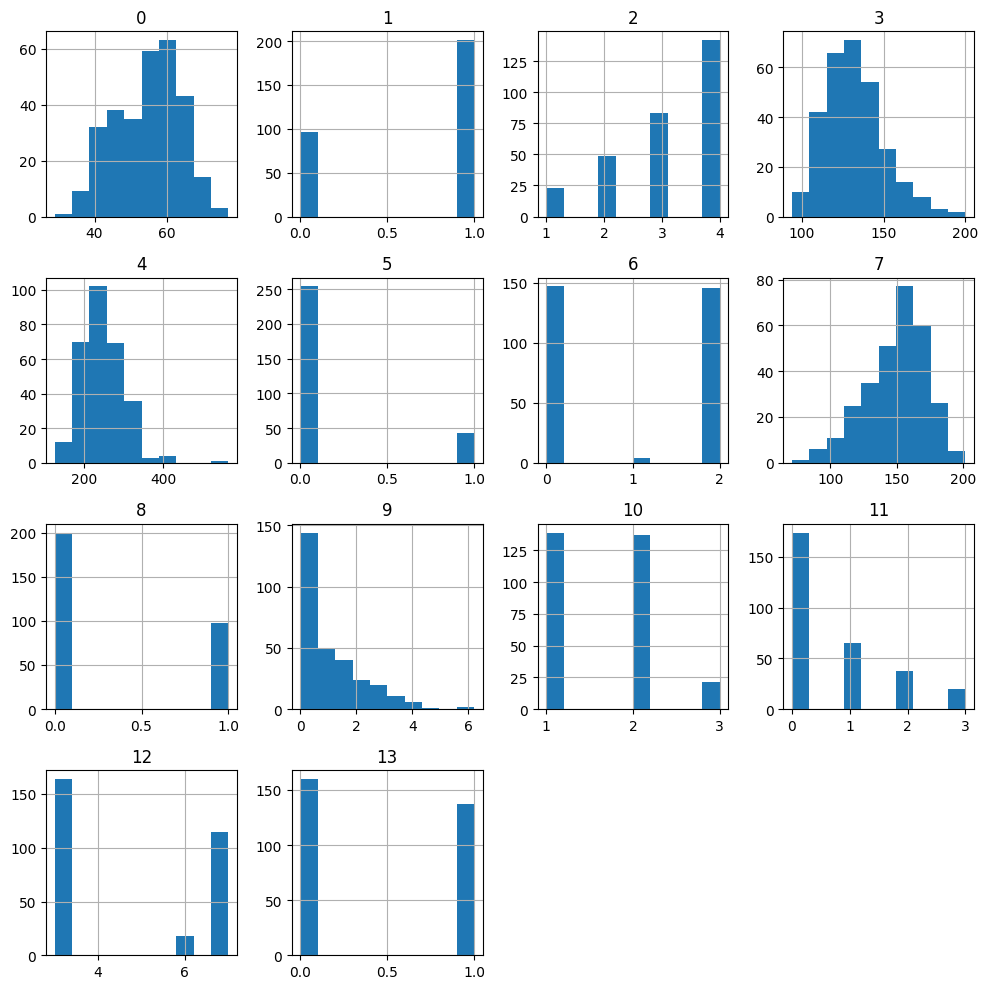

In [9]:
# Distribution of the data
dataset.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

#### Pair Plots

c:\Users\MOHD SUFYAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\MOHD SUFYAN\AppData\Local\Temp\ipykernel_17808\807899897.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


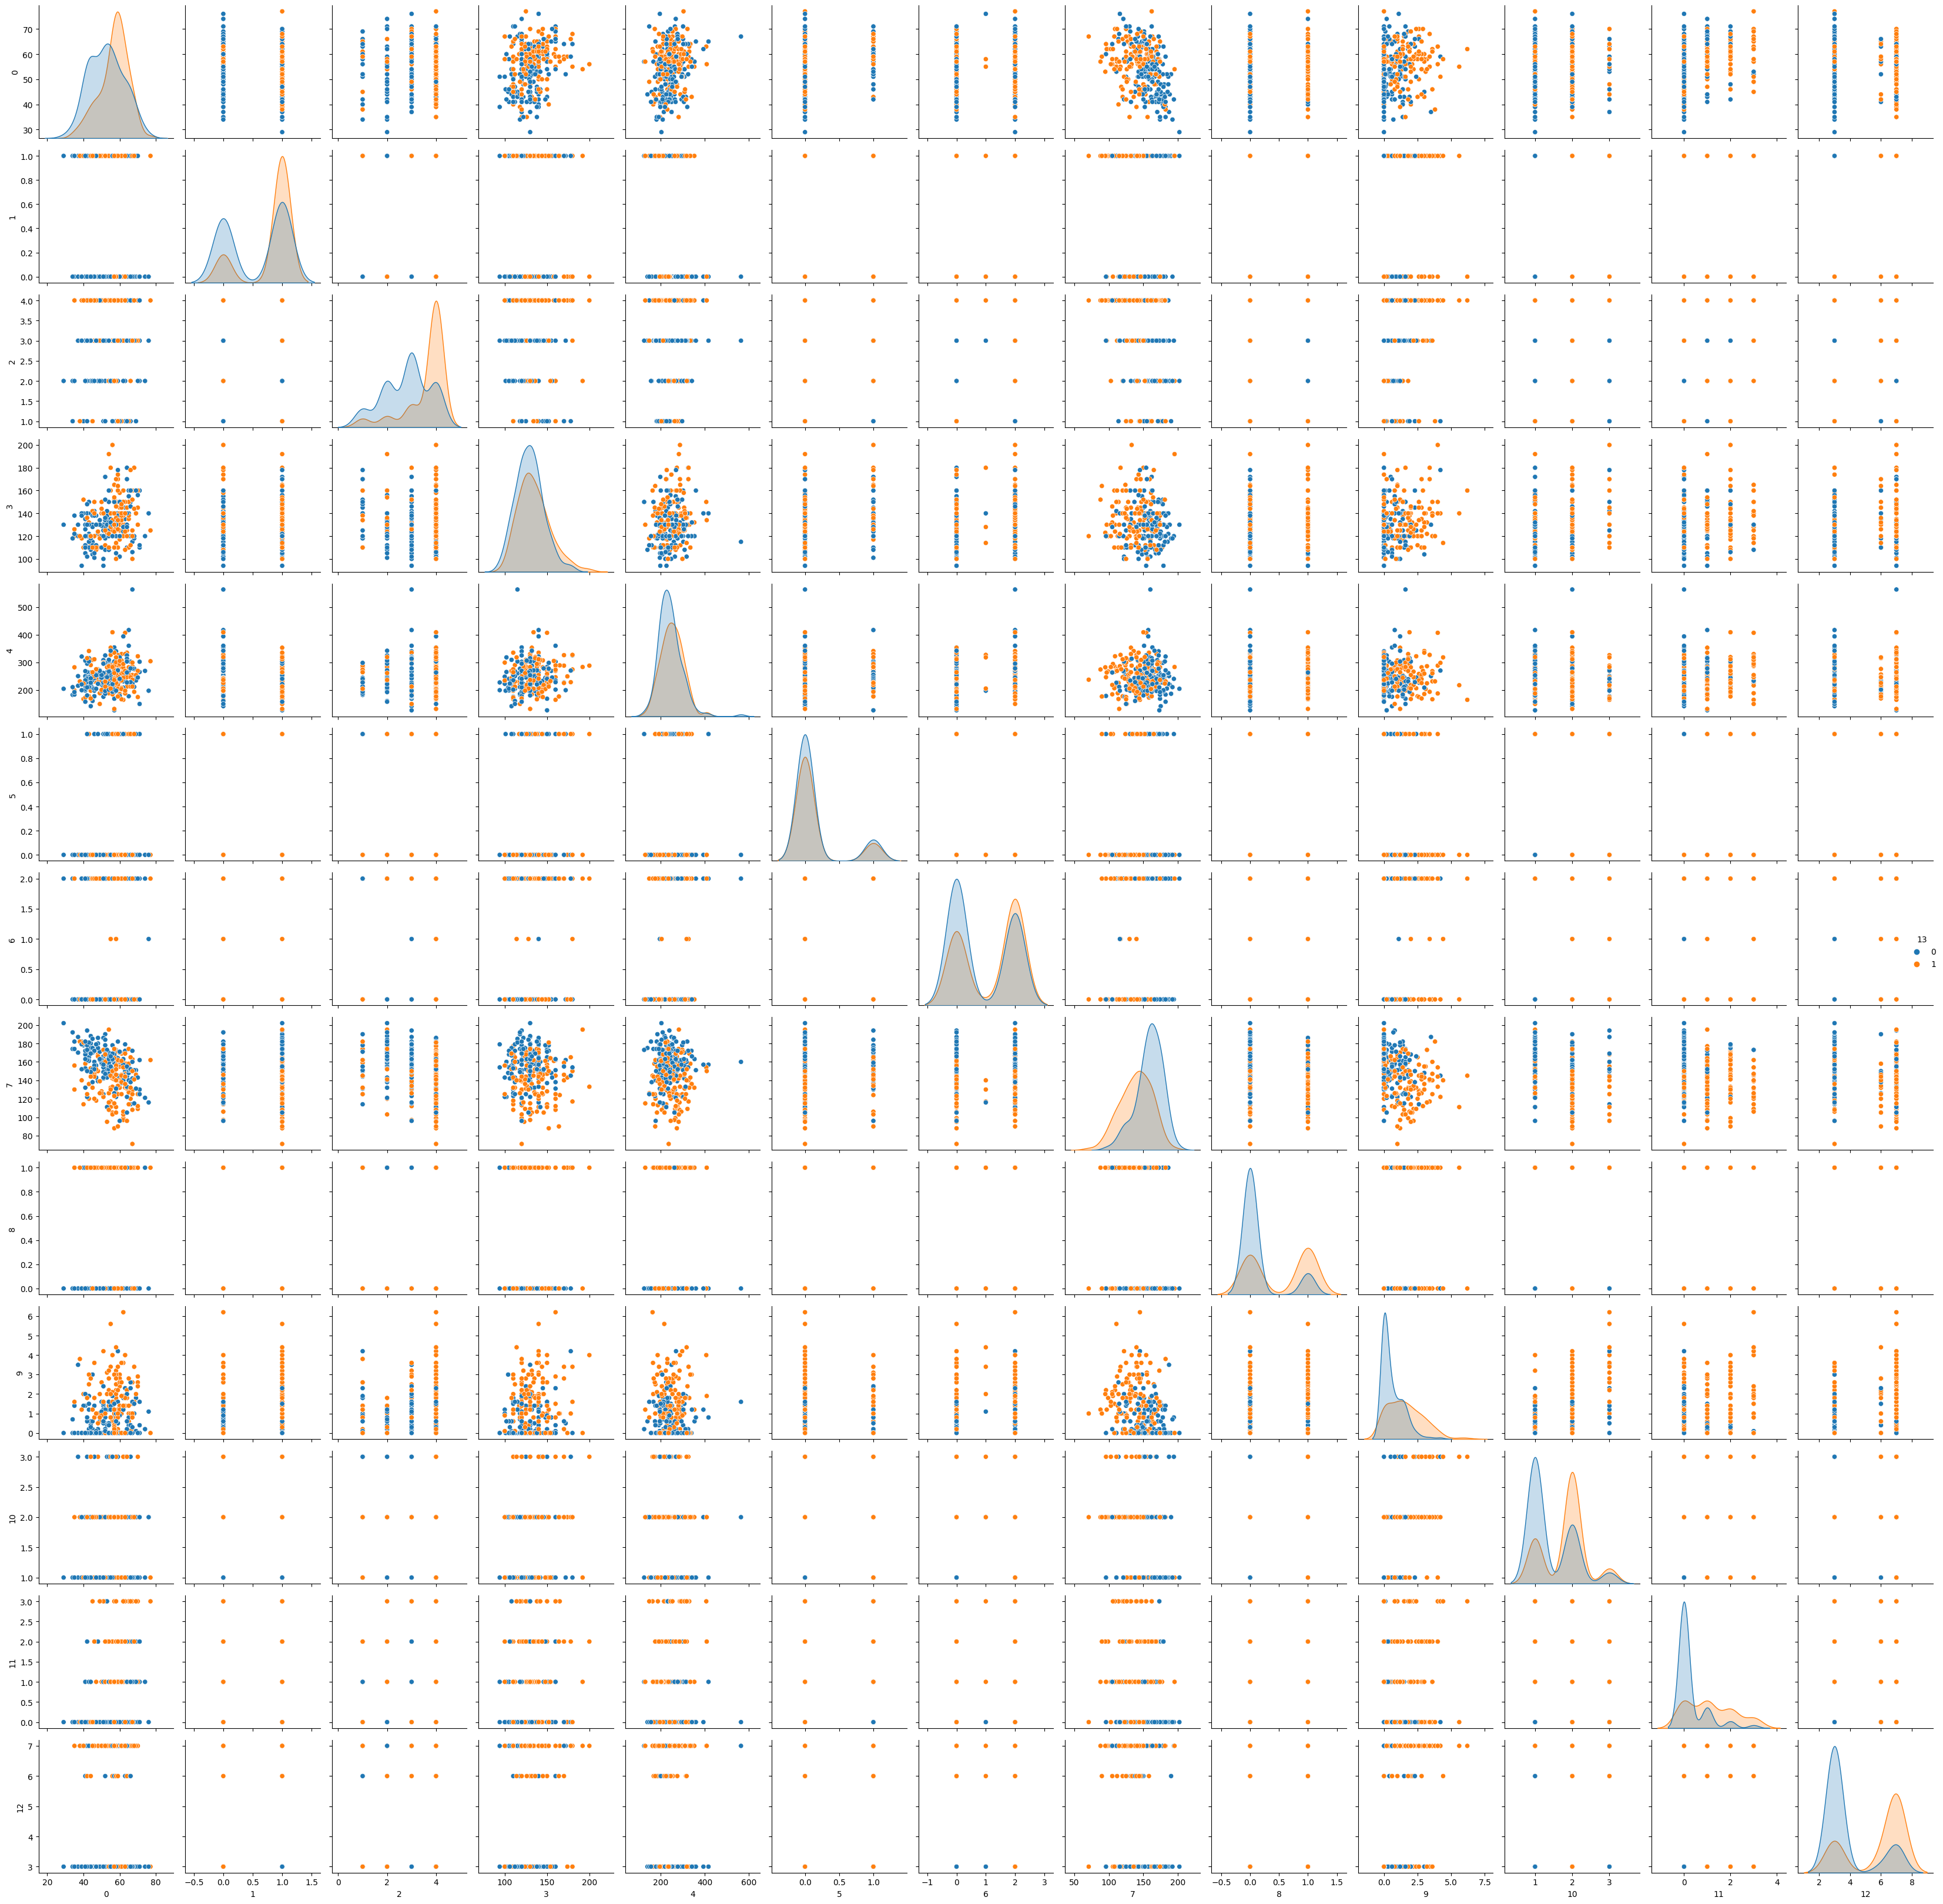

In [10]:
sns.pairplot(dataset, hue=dataset.columns[-1])
plt.tight_layout()
plt.show()

### Creating correlation heatmap

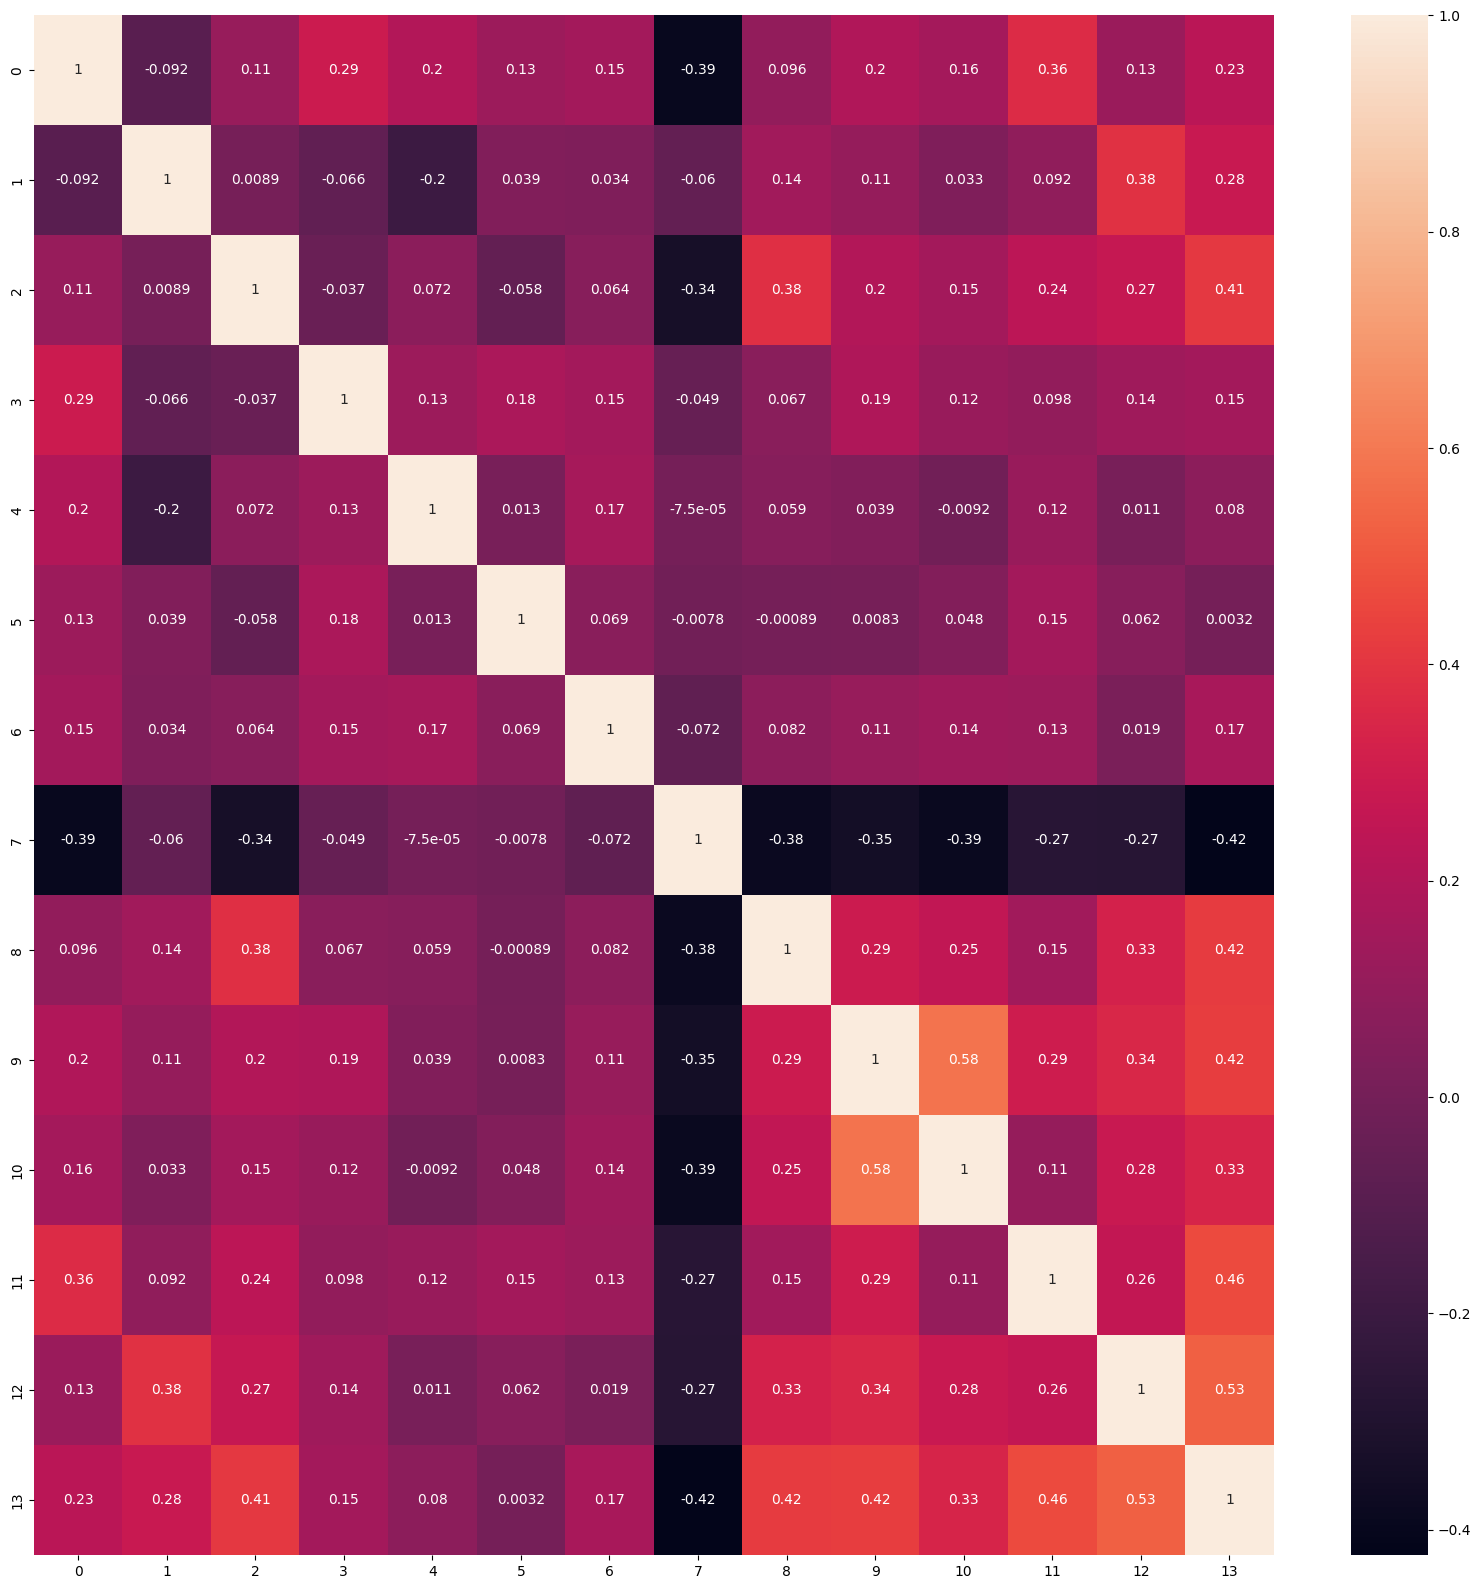

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

Here, we see that the 5th coloumn (indexed from 0) is very less correlated (~0.0032) with the output column.

### Creating scatterplots for all features v/s Output class

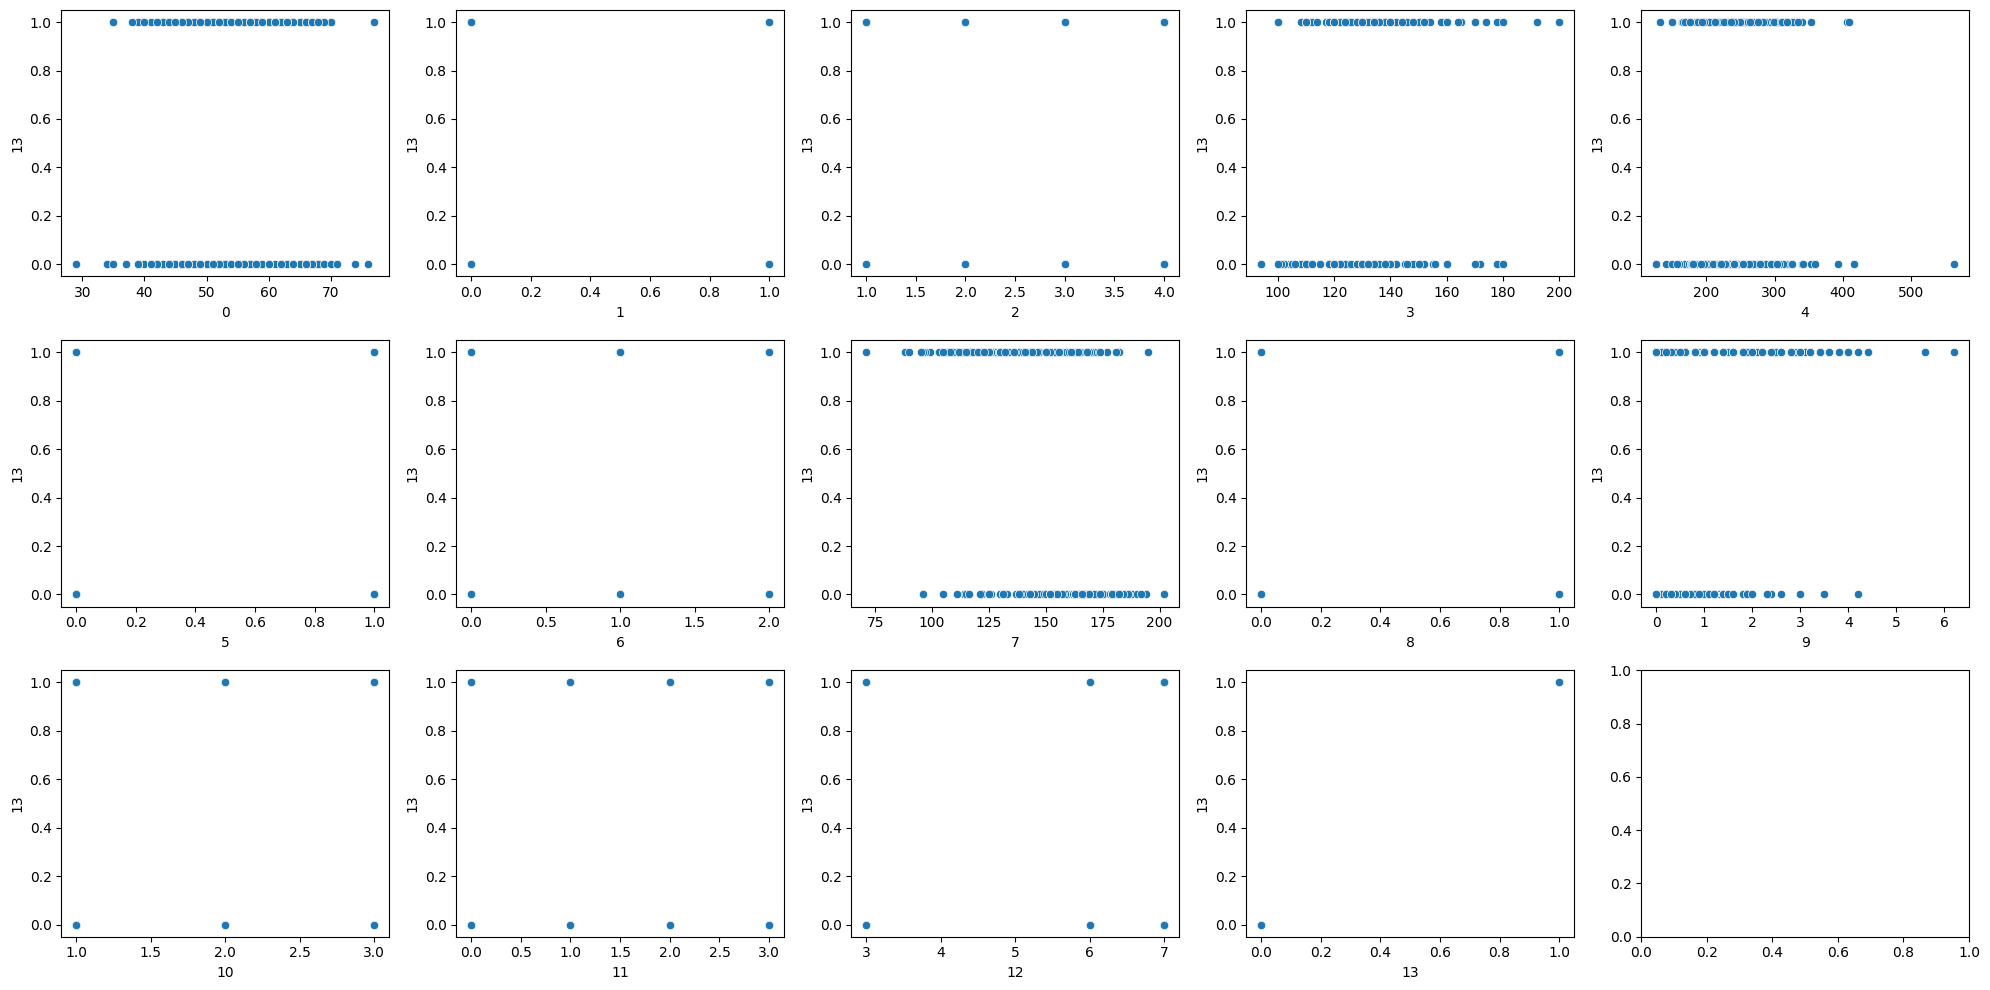

In [68]:
# Creating scatterplots for all attributes vs the last column in subplot
fig, ax = plt.subplots(3, 5, figsize=(20, 10))
col = 0
for i in range(0, 3):
    for j in range(0, 5):
        sns.scatterplot(x=dataset[dataset.columns[i*5+j]], y=dataset[dataset.columns[-1]], ax=ax[i, j])
        if col == len(dataset.columns) - 1:
            break
        col += 1

plt.tight_layout()
plt.show()

### Creating box plots

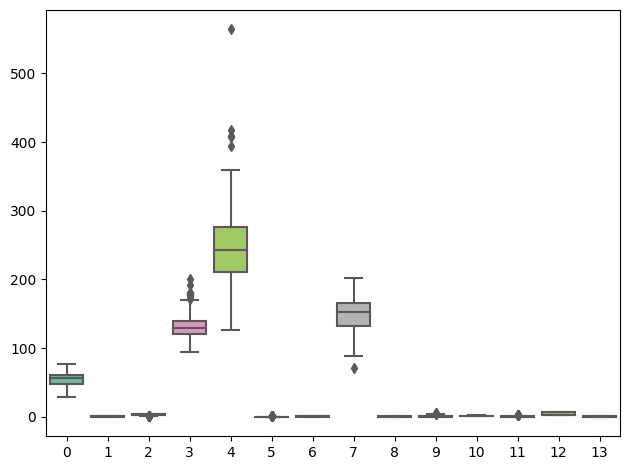

In [82]:
# Creating boxplots for the entire dataset
sns.boxplot(data=dataset, palette='Set2')
plt.tight_layout()
plt.show()

#### Distribution Plot for output class

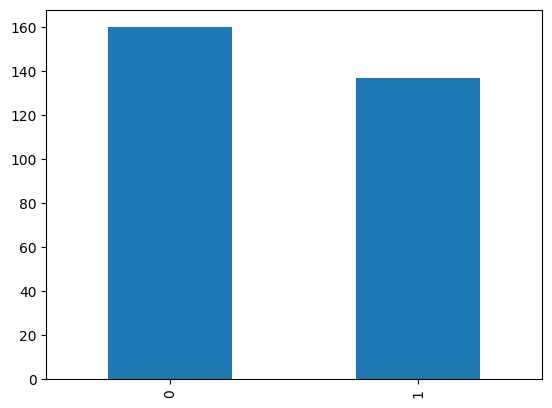

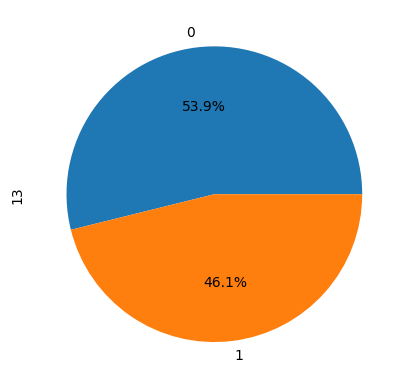

In [12]:
dataset[dataset.columns[-1]].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.show()

dataset[dataset.columns[-1]].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

### (b) (1 marks) Split the dataset into train and test sets in the ratio 80:20

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Splitting the dataset into training and testing sets with 80% training and 20% testing with stratisfied sampling
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

#### (c) (3 marks) Train decision trees using ‘entropy’ and ‘gini impurity’ as the splitting criterion and report the best criterion for attribute selection based on the accuracy scores.

In [15]:
def getmetrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    classification = classification_report(y_test, y_pred)
    
    return accuracy, precision, recall, f1score, auc, classification

In [55]:
# Training the Decision Tree model on the Training set using entropy and gini as the splitting criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(X_train, y_train)
pred_entropy = dt_entropy.predict(X_test)

metrics = getmetrics(y_test, pred_entropy)
print('Decision Tree Classifier with Entropy as the splitting criterion - ')
print('Test Accuracy: ', metrics[0])

Decision Tree Classifier with Entropy as the splitting criterion - 
Test Accuracy:  0.75


In [60]:
dt_entropy = DecisionTreeClassifier(criterion='gini')
dt_entropy.fit(X_train, y_train)
pred_entropy = dt_entropy.predict(X_test)

metrics = getmetrics(y_test, pred_entropy)
print('Decision Tree Classifier with Gini as the splitting criterion - ')
print('Test Accuracy: ', metrics[0])

Decision Tree Classifier with Gini as the splitting criterion - 
Test Accuracy:  0.7166666666666667


In [59]:
# run both he classifiers 100 times and get the average accuracy
entropy = []
gini = []

for i in range(0, 100):
    dt_entropy = DecisionTreeClassifier(criterion='entropy')
    dt_entropy.fit(X_train, y_train)
    pred_entropy = dt_entropy.predict(X_test)
    entropy.append(accuracy_score(y_test, pred_entropy))

    dt_gini = DecisionTreeClassifier(criterion='gini')
    dt_gini.fit(X_train, y_train)
    pred_gini = dt_gini.predict(X_test)
    gini.append(accuracy_score(y_test, pred_gini))

print('Average accuracy of Decision Tree Classifier with Entropy as the splitting criterion: ', np.mean(entropy))
print('Average accuracy of Decision Tree Classifier with Gini as the splitting criterion: ', np.mean(gini))

Average accuracy of Decision Tree Classifier with Entropy as the splitting criterion:  0.7336666666666666
Average accuracy of Decision Tree Classifier with Gini as the splitting criterion:  0.7105000000000001


Entropy is the best splitting criterion between Gini and Entropy as its accuracy score is higher

#### (d) (4 marks) Now taking the best criterion for attribute selection in part c, perform hyperparameter search for the parameters min_samples_split and max_features using Grid Search. Select the best combination of the hyperparameters using the test data scores.

In [63]:
# Performing hyperparameter tuning on the Decision Tree Classifier with Entropy as the splitting criterion
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}
dt = DecisionTreeClassifier(criterion='entropy')
grid_search = GridSearchCV(estimator=dt, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best accuracy: ', best_accuracy)
print('Best parameters: ', best_parameters)

Best accuracy:  0.8568840579710144
Best parameters:  {'max_depth': 3, 'max_features': 7, 'min_samples_split': 2}


#### (e) (5 marks) Finally train a random forest classifier for the same dataset. Perform Grid Search for the parameters n_estimators, max_depth and min_samples_split. Report the best combination of hyperparameters and present the classification report on the test data

In [66]:
def randomforest(X_train, y_train, X_test, y_test, criterion='gini'):
    rf = RandomForestClassifier(n_estimators=100, criterion=criterion)
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    return pred

# Training the Random Forest model on the Training set
pred = randomforest(X_train, y_train, X_test, y_test, 'entropy')
metrics = getmetrics(y_test, pred)
print('Random Forest Classifier with entropy without GridSearchCV- ')
print('Accuracy: ', metrics[0])

pred = randomforest(X_train, y_train, X_test, y_test, 'gini')
metrics = getmetrics(y_test, pred)
print('Random Forest Classifier with gini without GridSearchCV- ')
print('Accuracy: ', metrics[0])


Random Forest Classifier with entropy without GridSearchCV- 
Accuracy:  0.8166666666666667
Random Forest Classifier with gini without GridSearchCV- 
Accuracy:  0.8


In [68]:
# run both he classifiers 100 times and get the average accuracy
entropy = []
gini = []

for i in range(0, 50):
    pred = randomforest(X_train, y_train, X_test, y_test, 'entropy')
    entropy.append(accuracy_score(y_test, pred))

    pred = randomforest(X_train, y_train, X_test, y_test, 'gini')
    gini.append(accuracy_score(y_test, pred))

print('Average accuracy of Random Forest Classifier with Entropy as the splitting criterion: ', np.mean(entropy))
print('Average accuracy of Random Forest Classifier with Gini as the splitting criterion: ', np.mean(gini))

Average accuracy of Random Forest Classifier with Entropy as the splitting criterion:  0.8003333333333333
Average accuracy of Random Forest Classifier with Gini as the splitting criterion:  0.7939999999999999


In [128]:
# Performing hyperparameter tuning on the Random Forest Classifier
parameters = {'n_estimators': [50, 100, 150, 200, 250, 300], 'max_depth': [1, 2, 3, 4, 5, 6], 'min_samples_split': [3, 4, 5, 6, 7, 8, 9]}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best accuracy: ', best_accuracy)
print('Best parameters: ', best_parameters)
best_model = grid_search.best_estimator_

Best accuracy:  0.8522163120567375
Best parameters:  {'max_depth': 2, 'min_samples_split': 3, 'n_estimators': 250}


In [134]:
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)
metrics = getmetrics(y_test, pred)
print('Random Forest Classifier with best parameters- ')
print('Test Accuracy: ', metrics[0])
print('Classification Report: ')
print(metrics[5])

Random Forest Classifier with best parameters- 
Test Accuracy:  0.8333333333333334
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.82      0.82      0.82        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

